In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('titanic-passengers.csv', sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].isnull().sum()

177

In [7]:
df['Cabin'].isnull().sum()

687

In [8]:
df['Embarked'].isnull().sum()

2

In [9]:
import numpy as np
#we select numeric columns in the dataframe
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns

In [10]:
numeric

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,343,2,28.0,0,0,13.0000
1,76,3,25.0,0,0,7.6500
2,641,3,20.0,0,0,7.8542
3,568,3,29.0,0,4,21.0750
4,672,1,31.0,1,0,52.0000
...,...,...,...,...,...,...
886,10,2,14.0,1,0,30.0708
887,61,3,22.0,0,0,7.2292
888,535,3,30.0,0,0,8.6625
889,102,3,NaN,0,0,7.8958


In [11]:
#we fill the NaN values of numeric columns with the average value
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [12]:
#Fill missing value with the most frequent value of that column
df=df.fillna(df.mode().iloc[0])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [14]:
#Delete the Cabin column cuz we have so many missing values
df.drop('Cabin', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [16]:
def create_fam_size(df):
    return df["SibSp"] + df["Parch"] + 1

df["family_size"] = create_fam_size(df)

In [17]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,5
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,2
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S,3
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,1
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C,3
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S,1
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,2


In [18]:
import re
def create_categorical_title(df):
    def find_title(name: str) -> str:
        search = re.search(
            " ([A-Za-z]+)\.", name
        )  # Search for a word with a point at the end
        if search:
            title = search.group(1)
            if title in ["Mlle", "Ms"]:
                return "Miss"
            elif title in ["Mme", "Mrs"]:
                return "Mrs"
            elif title == "Mr":
                return "Mr"
            else:
                return "Rare"
        return ""

    return_title = df["Name"].apply(find_title)
    dict_title = {"Miss": 1, "Mrs": 2, "Mr": 3, "Rare": 4}
    return return_title.replace(dict_title)


df["Title"] = create_categorical_title(df)

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1,3
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1,3
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1,3
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,5,2
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,2,3
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S,3,3
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,1,3
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C,3,4
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S,1,3
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,2,2


In [20]:

def titanic_children(passenger):
    
    age , sex = passenger
    if age <16:
        return 'child'
    else:
        return sex
df['person'] = df[['Age','Sex']].apply(titanic_children,axis=1)

In [21]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,S,1,3,male
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,S,1,3,male
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,S,1,3,male
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,S,5,2,female
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,S,2,3,male
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,S,3,3,male
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,S,1,3,male
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,C,3,4,child
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,S,1,3,male
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,S,2,2,female


In [22]:
df["person"].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

In [23]:
df["Survived"].value_counts()

No     549
Yes    342
Name: Survived, dtype: int64

In [24]:
cleanup_Survived = {"survived":{"No": 0,"Yes": 1 }}

In [25]:
df = df.replace(cleanup_Survived) #replace Yes & No with a & 1
df.head(10) #print the 1st 5 rows of the data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1,3,male
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1,3,male
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1,3,male
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,5,2,female
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,2,3,male
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,S,3,3,male
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,1,3,male
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,C,3,4,child
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,S,1,3,male
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,S,2,2,female


In [26]:
cleanup_Sex = {"person":{"female": 0,"male": 1 , "child": 3}}

In [27]:
df = df.replace(cleanup_Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1,3,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1,3,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1,3,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,5,2,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,2,3,1


In [28]:
df['Alone'] = df.Parch + df.SibSp

In [29]:
#if Alone value is › then they are with family else they are Alone

df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone'] == 0] = 'Without family'

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person,Alone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,1,3,1,Without family
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,S,1,3,1,Without family
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,S,1,3,1,Without family
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,S,5,2,0,With Family
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,S,2,3,1,With Family


In [31]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
cleanup_Embarked = {"Embarked":     {"S": 1, "C": 2 , "Q": 3}}

In [33]:
df = df.replace(cleanup_Embarked)
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person,Alone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,1,1,3,1,Without family
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,1,1,3,1,Without family
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,1,1,3,1,Without family
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,1,5,2,0,With Family
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,1,2,3,1,With Family
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,1,3,3,1,With Family
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,1,1,3,1,Without family
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,2,3,4,3,With Family
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,1,1,3,1,Without family
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,1,2,2,0,With Family


In [34]:
df["Alone"].value_counts()

Without family    537
With Family       354
Name: Alone, dtype: int64

In [35]:
cleanup_Alone = {"Alone":     {"With Family": 1, "Alone": 0}}

In [36]:
df = df.replace(cleanup_Alone)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family_size,Title,person,Alone
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,1,1,3,1,Without family
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,1,1,3,1,Without family
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,1,1,3,1,Without family
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,1,5,2,0,1
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,1,2,3,1,1


In [37]:
df.drop('Name', axis=1, inplace=True)

In [38]:
df.drop('Ticket', axis=1, inplace=True)

In [39]:
df.drop('Fare', axis=1, inplace=True)

In [41]:
df.drop('PassengerId', axis=1, inplace=True)

In [42]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,family_size,Title,person,Alone
0,No,2,male,28.0,0,0,1,1,3,1,Without family
1,No,3,male,25.0,0,0,1,1,3,1,Without family
2,No,3,male,20.0,0,0,1,1,3,1,Without family
3,No,3,female,29.0,0,4,1,5,2,0,1
4,No,1,male,31.0,1,0,1,2,3,1,1
5,No,3,male,37.0,2,0,1,3,3,1,1
6,No,3,male,19.0,0,0,1,1,3,1,Without family
7,Yes,3,female,1.0,0,2,2,3,4,3,1
8,No,3,male,20.5,0,0,1,1,3,1,Without family
9,Yes,2,female,42.0,1,0,1,2,2,0,1


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


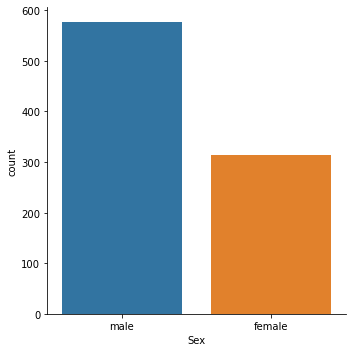

In [44]:
sns.factorplot('Sex',data=df,kind='count')


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


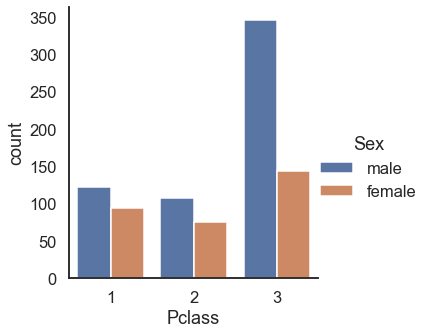

In [47]:
sns.factorplot('Pclass',data=df,hue='Sex',kind='count')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


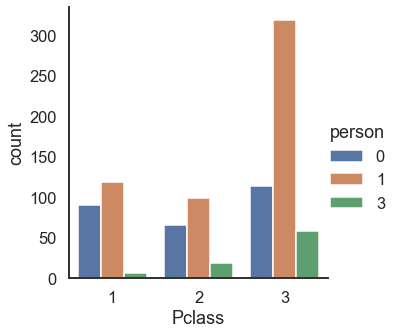

In [48]:
sns.factorplot('Pclass',data=df,hue='person',kind='count')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


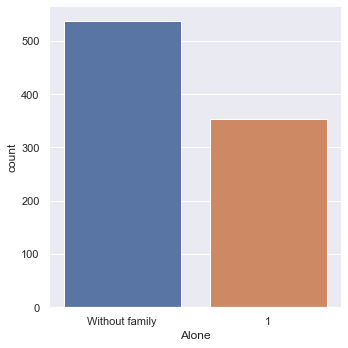

In [75]:
sns.factorplot('Alone',data=df,kind='count')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


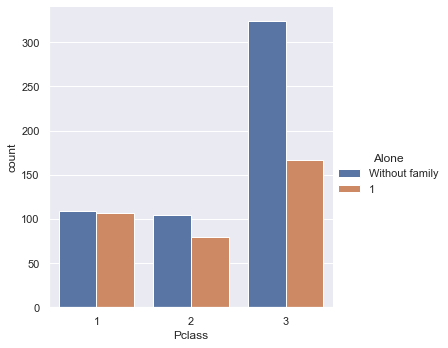

In [76]:
sns.factorplot('Pclass',data=df,hue='Alone',kind='count')

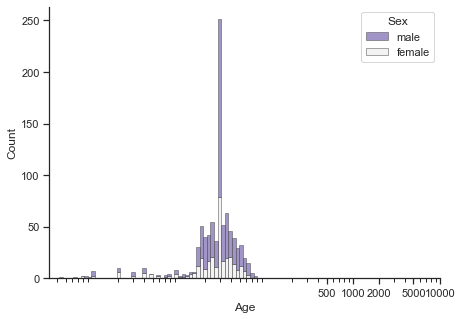

In [64]:
import matplotlib as mpl

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    df,
    x="Age", hue="Sex",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

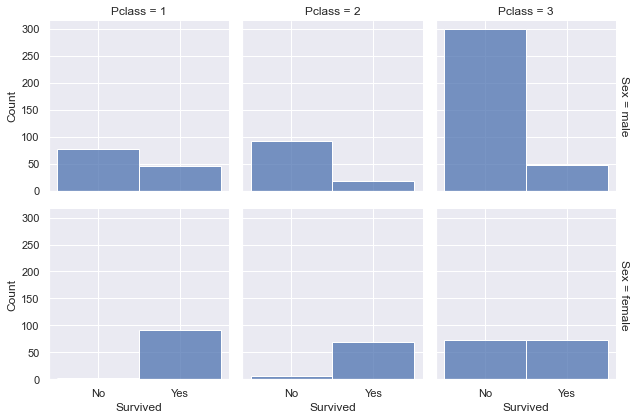

In [73]:
sns.set_theme(style="darkgrid")
sns.displot(
    df, x="Survived", col="Pclass", row="Sex",
binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot:>

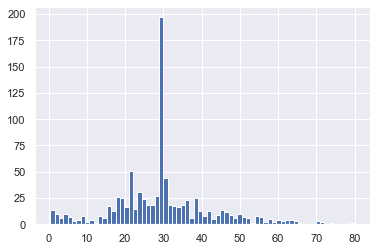

In [77]:
df['Age'].hist(bins=70)

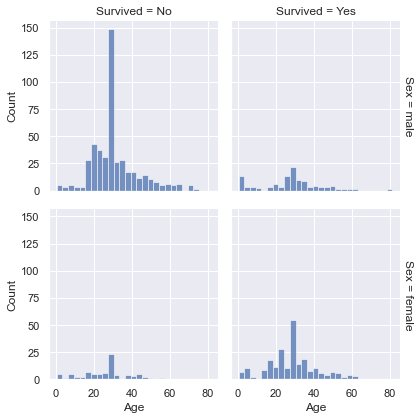

In [78]:
sns.displot(
    df, x="Age", col="Survived", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)  

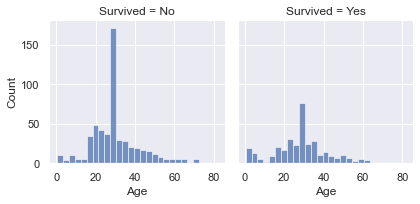

In [79]:
sns.set_theme(style="darkgrid")

sns.displot(
    df, x="Age", col="Survived",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)